In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas version:", pd.__version__)
#print("matplotlib.pyplot version:", plt.__version__)
print("seaborn version:", sns.__version__)

pandas version: 2.3.2
seaborn version: 0.13.2


In [2]:
df = pd.read_csv('Data/services-2025-10.csv')
df.head()

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform
0,16888633,2025-10-01,Nightjet,NS Int,420,False,False,69,152770640,NURNB,Nürnberg Hbf,NaN,NaN,NaN,2025-10-01T02:01:00+02:00,0.0,False,False,NaN,NaN
1,16888633,2025-10-01,Nightjet,NS Int,420,False,False,1,152770641,WURZB,Würzburg Hbf,2025-10-01T02:30:00+02:00,0.0,False,2025-10-01T02:32:00+02:00,0.0,False,False,NaN,NaN
2,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770642,FFFM,Frankfurt (M) Hbf,2025-10-01T04:55:00+02:00,0.0,False,2025-10-01T05:00:00+02:00,0.0,False,False,NaN,NaN
3,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770643,HAMM,Hamm (Westf.),2025-10-01T06:28:00+02:00,0.0,False,2025-10-01T06:30:00+02:00,0.0,False,False,NaN,NaN
4,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770644,MUNST,Münster (Westf) Hbf,2025-10-01T06:51:00+02:00,0.0,False,2025-10-01T07:54:00+02:00,0.0,False,False,NaN,NaN


In [3]:
# Find all stops at Eindhoven and Sittard
subset = df[df["Stop:Station code"].isin(["EHV", "STD"])]
 
valid_services = (
    subset.groupby("Service:RDT-ID")["Stop:Station code"] # We groupby RDT-ID and take only the stationcode from each record
    .nunique()                                            # Count the number of unique rows for each RDT-ID
)
valid_services = valid_services[valid_services == 2].index # Only take the services wich contain both EHV and STD

df_route = df[df["Service:RDT-ID"].isin(valid_services)] # Make a new Dataframe with the RDT-ID's

df_route.sample(10)

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform
1843182,17097201,2025-10-30,Intercity,NS,3942,False,True,0,154615361,HN,Hoorn,2025-10-30T14:21:00+01:00,0.0,True,2025-10-30T14:29:00+01:00,0.0,True,False,NaN,NaN
743672,16972877,2025-10-13,Intercity,NS,703926,False,False,0,153517179,HRL,Heerlen,NaN,NaN,NaN,2025-10-13T07:19:00+02:00,0.0,False,False,5,5
754893,16974212,2025-10-13,Intercity,NS,703938,False,False,0,153529238,RM,Roermond,2025-10-13T10:49:00+02:00,1.0,False,2025-10-13T10:50:00+02:00,1.0,False,False,2,2
54944,16894287,2025-10-01,Intercity,NS,3971,False,False,0,152827913,WT,Weert,2025-10-01T20:56:00+02:00,8.0,False,2025-10-01T20:56:00+02:00,8.0,False,True,3b,2
260043,16916123,2025-10-05,Intercity,NS,702937,False,False,0,153034054,BD,Breda,2025-10-05T11:15:00+02:00,1.0,False,2025-10-05T11:19:00+02:00,0.0,False,False,3,3
494748,16962079,2025-10-08,Intercity,NS,303655,False,True,0,153434044,STD,Sittard,2025-10-08T15:16:00+02:00,0.0,True,2025-10-08T15:17:00+02:00,0.0,True,False,NaN,NaN
1851522,17098065,2025-10-30,Intercity,NS,3953,False,True,0,154624165,STD,Sittard,2025-10-30T16:55:00+01:00,0.0,True,2025-10-30T16:56:00+01:00,0.0,True,False,NaN,NaN
1386552,17045751,2025-10-23,Intercity,NS,3122,False,False,0,154150201,ASDZ,Amsterdam Zuid,2025-10-23T08:44:00+02:00,4.0,False,2025-10-23T08:51:00+02:00,0.0,False,False,3,3
465873,16939638,2025-10-08,Intercity,NS,703657,False,True,0,153241367,RSD,Roosendaal,2025-10-08T17:33:00+02:00,0.0,True,NaN,NaN,NaN,False,NaN,NaN
1248889,17030882,2025-10-21,Intercity,NS,3124,False,True,0,154019917,UT,Utrecht Centraal,2025-10-21T08:46:00+02:00,0.0,True,2025-10-21T08:52:00+02:00,0.0,True,False,NaN,NaN


In [4]:
# 1) Parseer tijden voor sorteren binnen elke service (coalesce: Arr-time of Dep-time)
df = df.copy()

for col in ["Stop:Arrival time", "Stop:Departure time"]:
    df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)

# 'sort_time' = eerste beschikbare tijd (arr of dep) zodat begin/eindstations kloppen
df["sort_time"] = df["Stop:Arrival time"].fillna(df["Stop:Departure time"])

df

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform,sort_time
0,16888633,2025-10-01,Nightjet,NS Int,420,False,False,69,152770640,NURNB,...,NaT,NaN,NaN,2025-10-01 00:01:00+00:00,0.0,False,False,NaN,NaN,2025-10-01 00:01:00+00:00
1,16888633,2025-10-01,Nightjet,NS Int,420,False,False,1,152770641,WURZB,...,2025-10-01 00:30:00+00:00,0.0,False,2025-10-01 00:32:00+00:00,0.0,False,False,NaN,NaN,2025-10-01 00:30:00+00:00
2,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770642,FFFM,...,2025-10-01 02:55:00+00:00,0.0,False,2025-10-01 03:00:00+00:00,0.0,False,False,NaN,NaN,2025-10-01 02:55:00+00:00
3,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770643,HAMM,...,2025-10-01 04:28:00+00:00,0.0,False,2025-10-01 04:30:00+00:00,0.0,False,False,NaN,NaN,2025-10-01 04:28:00+00:00
4,16888633,2025-10-01,Nightjet,NS Int,420,False,False,0,152770644,MUNST,...,2025-10-01 04:51:00+00:00,0.0,False,2025-10-01 05:54:00+00:00,0.0,False,False,NaN,NaN,2025-10-01 04:51:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952919,17127360,2025-10-31,Intercity,NS,102272,False,True,0,154894936,GS,...,2025-10-31 22:46:00+00:00,14.0,False,2025-10-31 22:46:00+00:00,14.0,False,False,1,1,2025-10-31 22:46:00+00:00
1952920,17127360,2025-10-31,Intercity,NS,102272,False,True,0,154894937,ARN,...,2025-10-31 22:56:00+00:00,13.0,False,2025-10-31 22:56:00+00:00,13.0,False,False,2,2,2025-10-31 22:56:00+00:00
1952921,17127360,2025-10-31,Intercity,NS,102272,False,True,0,154894938,MDB,...,2025-10-31 23:01:00+00:00,12.0,False,2025-10-31 23:01:00+00:00,12.0,False,False,1,1,2025-10-31 23:01:00+00:00
1952922,17127360,2025-10-31,Intercity,NS,102272,False,True,0,154894939,VSS,...,2025-10-31 23:06:00+00:00,11.0,False,2025-10-31 23:06:00+00:00,11.0,False,False,1,1,2025-10-31 23:06:00+00:00


In [5]:
# 2) Bepaal per service het begin- en eindstation (op basis van sort_time)
#    (neem ook company/type mee als je later wilt filteren op Intercity/NS)
cols_keep = ["Service:RDT-ID", "Service:Company", "Service:Type"]

# Sorteer binnen service
df_sorted = df.sort_values(["Service:RDT-ID", "sort_time"])

# Pak eerste en laatste station/stop
first_stops = (
    df_sorted.groupby("Service:RDT-ID")
    .agg(start_name=("Stop:Station name", "first"),
         start_code=("Stop:Station code", "first"))
)


last_stops = (
    df_sorted.groupby("Service:RDT-ID")
    .agg(end_name=("Stop:Station name", "last"),
         end_code=("Stop:Station code", "last"))
)

meta_base = (
    df_sorted.groupby("Service:RDT-ID")[["Service:Company", "Service:Type"]]
    .first()
)

In [6]:
meta = (
    meta_base
    .join(first_stops)
    .join(last_stops)
    .reset_index()
)

meta

,Service:RDT-ID,Service:Company,Service:Type,start_name,start_code,end_name,end_code
0,16888633,NS Int,Nightjet,Nürnberg Hbf,NURNB,Amsterdam Centraal,ASD
1,16888634,NS,Intercity,Rotterdam Centraal,RTD,Utrecht Centraal,UT
2,16888635,NS,Intercity,Schiphol Airport,SHL,Utrecht Centraal,UT
3,16888636,NS,Intercity,Utrecht Centraal,UT,Rotterdam Centraal,RTD
4,16888637,NS,Intercity,Utrecht Centraal,UT,Schiphol Airport,SHL
...,...,...,...,...,...,...,...
219838,17126661,TCS OV,Sneltrein,Venlo,VL,Kaldenkirchen,KN
219839,17126662,TCS OV,Sneltrein,Kaldenkirchen,KN,Venlo,VL
219840,17126934,NS,Intercity,Amsterdam Centraal,ASD,Vlissingen,VS
219841,17127356,NS,Intercity,Amsterdam Centraal,ASD,Vlissingen,VS


In [7]:
# 3) Definieer jouw begin- en eindstationsets (namen of codes, kies 1 en blijf consistent)
south_starts = {"Heerlen", "Maastricht"}
north_ends   = {"Enkhuizen", "Alkmaar"}

north_starts = {"Enkhuizen", "Alkmaar"}
south_ends   = {"Heerlen", "Maastricht"}

# 4) Filter services die aan jouw voorwaarden voldoen (beide richtingen)
mask_south_to_north = meta["start_name"].isin(south_starts) & meta["end_name"].isin(north_ends)
mask_north_to_south = meta["start_name"].isin(north_starts) & meta["end_name"].isin(south_ends)

valid_services = meta.loc[mask_south_to_north | mask_north_to_south, "Service:RDT-ID"]

df_clean = df[df["Service:RDT-ID"].isin(valid_services)].copy()

print(f"Totaal services: {meta.shape[0]:,}")
print(f"Geselecteerde services (beide richtingen): {valid_services.nunique():,}")
print(f"Aantal rijen in df_clean: {df_clean.shape[0]:,}")

Totaal services: 219,843
Geselecteerde services (beide richtingen): 1,321
Aantal rijen in df_clean: 19,505


In [8]:
df_clean

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform,sort_time
360,16888678,2025-10-01,Intercity,NS,2919,False,False,2,152771015,EKZ,...,NaT,NaN,NaN,2025-10-01 03:09:00+00:00,0.0,False,False,1,1,2025-10-01 03:09:00+00:00
361,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771016,BKF,...,2025-10-01 03:13:00+00:00,0.0,False,2025-10-01 03:13:00+00:00,0.0,False,False,1,1,2025-10-01 03:13:00+00:00
362,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771017,BKG,...,2025-10-01 03:16:00+00:00,0.0,False,2025-10-01 03:17:00+00:00,0.0,False,False,2,2,2025-10-01 03:16:00+00:00
363,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771018,HKS,...,2025-10-01 03:21:00+00:00,0.0,False,2025-10-01 03:22:00+00:00,0.0,False,False,2,2,2025-10-01 03:21:00+00:00
364,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771019,HNK,...,2025-10-01 03:29:00+00:00,0.0,False,2025-10-01 03:29:00+00:00,0.0,False,False,1,1,2025-10-01 03:29:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887726,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801478,EHV,...,2025-10-30 22:57:00+00:00,0.0,False,2025-10-30 22:59:00+00:00,0.0,False,False,1,1,2025-10-30 22:57:00+00:00
1887727,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801479,WT,...,2025-10-30 23:16:00+00:00,0.0,False,2025-10-30 23:16:00+00:00,0.0,False,False,3b,3b,2025-10-30 23:16:00+00:00
1887728,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801480,RM,...,2025-10-30 23:29:00+00:00,0.0,False,2025-10-30 23:30:00+00:00,0.0,False,False,1,1,2025-10-30 23:29:00+00:00
1887729,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801481,STD,...,2025-10-30 23:45:00+00:00,0.0,False,2025-10-30 23:46:00+00:00,0.0,False,False,3b,3b,2025-10-30 23:45:00+00:00


In [9]:
stops_per_service = df_clean.groupby("Service:RDT-ID")["Stop:Station name"].apply(list)

station_counts = pd.Series(
    [station for service in stops_per_service for station in service]
).value_counts()

n_services = len(stops_per_service)
station_percent = station_counts / n_services * 100

station_percent = station_percent.reset_index()
station_percent.columns = ["Station", "Share (%)"]

print(stops_per_service)
print("Station Counts:")
print(station_counts)
print(station_percent)

Service:RDT-ID
16888678    [Enkhuizen, Bovenkarspel Flora, Bovenkarspel-G...
16888737    [Maastricht, Sittard, Roermond, Weert, Eindhov...
16888776    [Enkhuizen, Bovenkarspel Flora, Bovenkarspel-G...
16888830    [Heerlen, Sittard, Roermond, Weert, Eindhoven ...
16888906    [Maastricht, Sittard, Roermond, Weert, Eindhov...
                                  ...                        
17117512    [Maastricht, Sittard, Roermond, Weert, Eindhov...
17117514    [Enkhuizen, Bovenkarspel Flora, Bovenkarspel-G...
17117516    [Maastricht, Sittard, Roermond, Weert, Eindhov...
17117517    [Enkhuizen, Bovenkarspel Flora, Bovenkarspel-G...
17117520    [Enkhuizen, Bovenkarspel Flora, Bovenkarspel-G...
Name: Stop:Station name, Length: 1321, dtype: object
Station Counts:
Roermond                    1321
Eindhoven Centraal          1321
Sittard                     1321
Amsterdam Sloterdijk        1321
Amsterdam Centraal          1321
Amsterdam Amstel            1321
Utrecht Centraal            1321
's-

In [10]:
rare_stations = station_counts[station_counts < 50].index

rare_stations

Index(['Purmerend Overwhere', 'Zaandam Kogerveld', 'Purmerend Weidevenne',
       'Purmerend', 'Boxtel', 'Geldermalsen'],
      dtype='object')

In [11]:
services_with_rare = df_clean[df_clean["Stop:Station name"].isin(rare_stations)]["Service:RDT-ID"].unique()

services_with_rare

array([16907581, 17042194, 17066143, 17068784, 17060987, 17068015,
       17091544, 17111218, 17096551, 17096722], dtype=int64)

In [12]:
df_clean = df_clean[~df_clean["Service:RDT-ID"].isin(services_with_rare)].copy()

df_clean

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform,sort_time
360,16888678,2025-10-01,Intercity,NS,2919,False,False,2,152771015,EKZ,...,NaT,NaN,NaN,2025-10-01 03:09:00+00:00,0.0,False,False,1,1,2025-10-01 03:09:00+00:00
361,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771016,BKF,...,2025-10-01 03:13:00+00:00,0.0,False,2025-10-01 03:13:00+00:00,0.0,False,False,1,1,2025-10-01 03:13:00+00:00
362,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771017,BKG,...,2025-10-01 03:16:00+00:00,0.0,False,2025-10-01 03:17:00+00:00,0.0,False,False,2,2,2025-10-01 03:16:00+00:00
363,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771018,HKS,...,2025-10-01 03:21:00+00:00,0.0,False,2025-10-01 03:22:00+00:00,0.0,False,False,2,2,2025-10-01 03:21:00+00:00
364,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771019,HNK,...,2025-10-01 03:29:00+00:00,0.0,False,2025-10-01 03:29:00+00:00,0.0,False,False,1,1,2025-10-01 03:29:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887726,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801478,EHV,...,2025-10-30 22:57:00+00:00,0.0,False,2025-10-30 22:59:00+00:00,0.0,False,False,1,1,2025-10-30 22:57:00+00:00
1887727,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801479,WT,...,2025-10-30 23:16:00+00:00,0.0,False,2025-10-30 23:16:00+00:00,0.0,False,False,3b,3b,2025-10-30 23:16:00+00:00
1887728,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801480,RM,...,2025-10-30 23:29:00+00:00,0.0,False,2025-10-30 23:30:00+00:00,0.0,False,False,1,1,2025-10-30 23:29:00+00:00
1887729,17117520,2025-10-30,Intercity,NS,302985,False,True,0,154801481,STD,...,2025-10-30 23:45:00+00:00,0.0,False,2025-10-30 23:46:00+00:00,0.0,False,False,3b,3b,2025-10-30 23:45:00+00:00


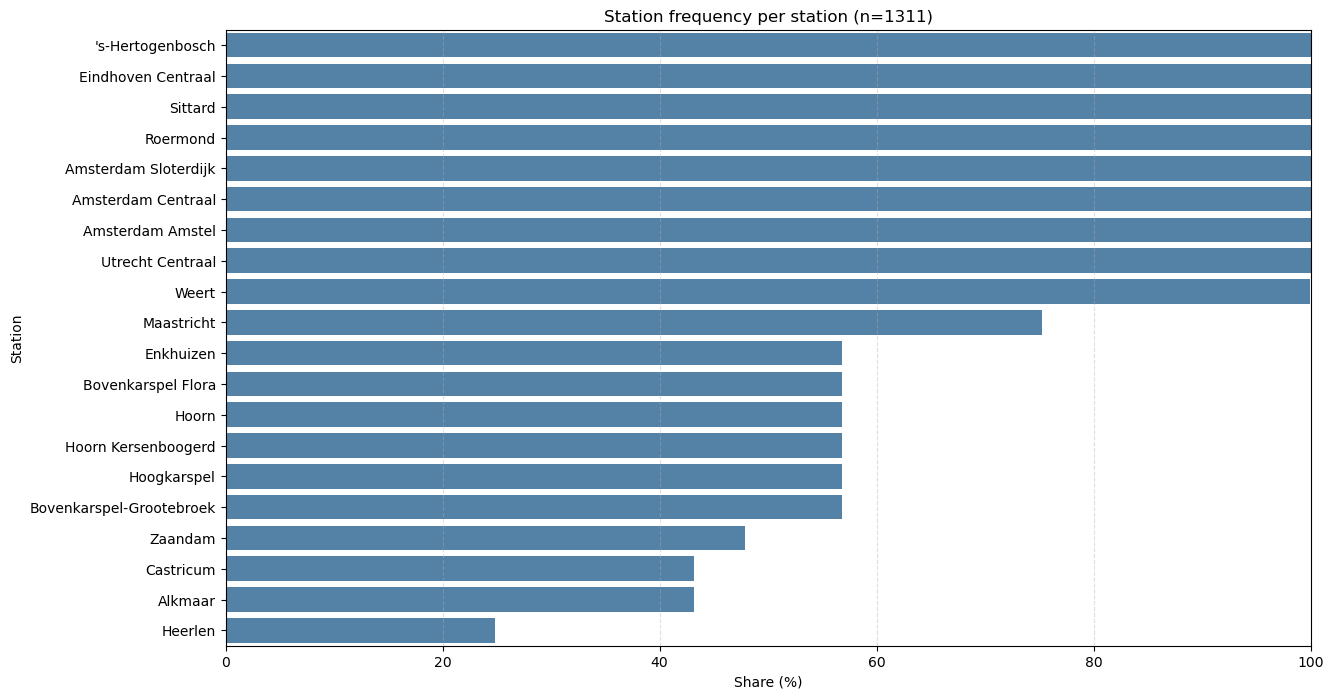

In [13]:
stops_per_service = df_clean.groupby("Service:RDT-ID")["Stop:Station name"].apply(list)

station_counts = pd.Series(
    [station for service in stops_per_service for station in service]
).value_counts()

n_services = len(stops_per_service)
station_percent = station_counts / n_services * 100

station_percent = station_percent.reset_index()
station_percent.columns = ["Station", "Share (%)"]

plt.figure(figsize=(14,8))
sns.barplot(data=station_percent, x="Share (%)", y="Station", color="steelblue")
plt.title(f"Station frequency per station (n={n_services})")
plt.xlabel("Share (%)")
plt.ylabel("Station")
plt.xlim(0,100)
plt.grid(axis="x", ls="--", alpha=0.4)
plt.show()

In [14]:
df_clean["departure_time"] = pd.to_datetime(df["Stop:Departure time"], errors="coerce")

df_clean[["Stop:Departure time", "departure_time"]]

,Stop:Departure time,departure_time
360,2025-10-01 03:09:00+00:00,2025-10-01 03:09:00+00:00
361,2025-10-01 03:13:00+00:00,2025-10-01 03:13:00+00:00
362,2025-10-01 03:17:00+00:00,2025-10-01 03:17:00+00:00
363,2025-10-01 03:22:00+00:00,2025-10-01 03:22:00+00:00
364,2025-10-01 03:29:00+00:00,2025-10-01 03:29:00+00:00
...,...,...
1887726,2025-10-30 22:59:00+00:00,2025-10-30 22:59:00+00:00
1887727,2025-10-30 23:16:00+00:00,2025-10-30 23:16:00+00:00
1887728,2025-10-30 23:30:00+00:00,2025-10-30 23:30:00+00:00
1887729,2025-10-30 23:46:00+00:00,2025-10-30 23:46:00+00:00


In [15]:
df_clean["hour"] = df_clean["departure_time"].dt.hour
df_clean["day_of_week"] = df_clean["departure_time"].dt.dayofweek
df_clean["month"] = df_clean["departure_time"].dt.month
df_clean["is_weekend"] = df_clean["day_of_week"].isin([5,6]).astype(int)
df_clean["is_rushhour"] = df_clean["hour"].isin([7,8,9,16,17,18]).astype(int)

df_clean[["hour", "day_of_week", "month", "is_weekend", "is_rushhour"]]

,hour,day_of_week,month,is_weekend,is_rushhour
360,3.0,2.0,10.0,0,0
361,3.0,2.0,10.0,0,0
362,3.0,2.0,10.0,0,0
363,3.0,2.0,10.0,0,0
364,3.0,2.0,10.0,0,0
...,...,...,...,...,...
1887726,22.0,3.0,10.0,0,0
1887727,23.0,3.0,10.0,0,0
1887728,23.0,3.0,10.0,0,0
1887729,23.0,3.0,10.0,0,0


In [16]:
df_clean[["hour", "day_of_week", "month", "is_weekend", "is_rushhour"]].describe()

,hour,day_of_week,month,is_weekend,is_rushhour
count,18027.000000,18027.000000,18027.0,19338.000000,19338.000000
mean,12.769457,2.371998,10.0,0.080618,0.336281
std,4.728111,1.581496,0.0,0.272255,0.472449
min,3.000000,0.000000,10.0,0.000000,0.000000
25%,9.000000,1.000000,10.0,0.000000,0.000000
50%,13.000000,2.000000,10.0,0.000000,0.000000
75%,17.000000,3.000000,10.0,0.000000,1.000000
max,23.000000,6.000000,10.0,1.000000,1.000000


In [17]:
df_clean["number_of_stops"] = df_clean.groupby("Service:RDT-ID")["Stop:Station code"].transform("count")
df_clean["platform_change"] = df_clean["Stop:Platform change"].astype(int)
df_clean["partly_cancelled"] = df_clean["Service:Partly cancelled"].astype(int)
df_clean["completely_cancelled"] = df_clean["Service:Completely cancelled"].astype(int)

df_clean[["number_of_stops", "platform_change", "partly_cancelled", "completely_cancelled"]]

,number_of_stops,platform_change,partly_cancelled,completely_cancelled
360,16,0,0,0
361,16,0,0,0
362,16,0,0,0
363,16,0,0,0
364,16,0,0,0
...,...,...,...,...
1887726,16,0,1,0
1887727,16,0,1,0
1887728,16,0,1,0
1887729,16,0,1,0


In [18]:
df_clean[["number_of_stops", "platform_change", "partly_cancelled", "completely_cancelled"]].describe()

,number_of_stops,platform_change,partly_cancelled,completely_cancelled
count,19338.000000,19338.000000,19338.000000,19338.000000
mean,14.911676,0.050677,0.261816,0.007033
std,1.515791,0.219344,0.439634,0.083568
min,12.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000,0.000000
75%,16.000000,0.000000,1.000000,0.000000
max,17.000000,1.000000,1.000000,1.000000


In [19]:
df_clean["departure_delay_start"] = df_clean.groupby("Service:RDT-ID")["Stop:Departure delay"].transform("first")
df_clean["arrival_delay_previous"] = df_clean.groupby("Service:RDT-ID")["Stop:Arrival delay"].shift(1)
df_clean["max_delay_so_far"] = df_clean.groupby("Service:RDT-ID")["Stop:Departure delay"].cummax()

df_clean[["departure_delay_start", "arrival_delay_previous", "max_delay_so_far"]].sample(10)

,departure_delay_start,arrival_delay_previous,max_delay_so_far
1322685,0.0,0.0,2.0
151050,0.0,0.0,5.0
1841412,0.0,0.0,0.0
20493,0.0,1.0,0.0
1392937,1.0,4.0,4.0
1320716,0.0,1.0,8.0
1625725,0.0,3.0,4.0
1288449,2.0,3.0,5.0
1630387,0.0,1.0,3.0
1789723,0.0,0.0,1.0


In [20]:
df_clean["arrival_time"] = pd.to_datetime(df_clean["Stop:Arrival time"], errors="coerce")
df_clean["planned_dwell_time"] = (df_clean["departure_time"] - df_clean["arrival_time"]).dt.total_seconds() / 60

prev_dep = df.groupby("Service:RDT-ID")["Stop:Departure time"].shift(1)
df_clean["planned_travel_time_per_station"] = (
    (df_clean["Stop:Arrival time"] - prev_dep)
    .dt.total_seconds() / 60
)

df_clean[["arrival_time", "departure_time", "planned_dwell_time", "planned_travel_time_per_station"]].sample(10)

,arrival_time,departure_time,planned_dwell_time,planned_travel_time_per_station
119535,2025-10-02 20:35:00+00:00,2025-10-02 20:38:00+00:00,3.0,27.0
1789727,2025-10-29 15:47:00+00:00,2025-10-29 15:47:00+00:00,0.0,18.0
1856157,2025-10-30 16:28:00+00:00,2025-10-30 16:30:00+00:00,2.0,13.0
76950,2025-10-02 09:33:00+00:00,NaT,NaN,9.0
1701415,2025-10-28 08:23:00+00:00,2025-10-28 08:23:00+00:00,0.0,8.0
136053,2025-10-03 07:59:00+00:00,2025-10-03 08:00:00+00:00,1.0,13.0
1770136,2025-10-29 08:19:00+00:00,2025-10-29 08:19:00+00:00,0.0,14.0
178674,NaT,2025-10-03 17:29:00+00:00,NaN,NaN
35898,2025-10-01 13:21:00+00:00,2025-10-01 13:22:00+00:00,1.0,4.0
1627154,2025-10-27 05:21:00+00:00,2025-10-27 05:23:00+00:00,2.0,4.0


In [21]:
df_clean["is_delayed"] = (df_clean["Service:Maximum delay"] >= 5).astype(int)

df_clean.sample(10)

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,platform_change,partly_cancelled,completely_cancelled,departure_delay_start,arrival_delay_previous,max_delay_so_far,arrival_time,planned_dwell_time,planned_travel_time_per_station,is_delayed
1322636,17039123,2025-10-22,Intercity,NS,2731,False,False,0,154091747,WT,...,0,0,0,0.0,1.0,1.0,2025-10-22 08:45:00+00:00,0.0,18.0,0
1207207,17026516,2025-10-20,Intercity,NS,2754,False,False,0,153982731,ZD,...,0,0,0,0.0,11.0,12.0,2025-10-20 15:12:00+00:00,0.0,7.0,0
1468423,17056329,2025-10-24,Intercity,NS,2936,False,False,0,154240142,HT,...,0,0,0,0.0,0.0,2.0,2025-10-24 09:22:00+00:00,1.0,19.0,0
1531258,17063352,2025-10-25,Intercity,NS,2740,False,False,0,154301803,CAS,...,0,0,0,0.0,0.0,1.0,2025-10-25 11:50:00+00:00,0.0,14.0,0
1266238,17032848,2025-10-21,Intercity,NS,2743,False,True,0,154037378,RM,...,0,1,0,2.0,0.0,3.0,2025-10-21 11:58:00+00:00,2.0,13.0,0
158325,16904665,2025-10-03,Intercity,NS,2953,False,False,0,152931567,ASS,...,0,0,0,0.0,0.0,1.0,2025-10-03 12:29:00+00:00,3.0,24.0,0
1714011,17084051,2025-10-28,Intercity,NS,3945,False,False,0,154486932,HRL,...,0,0,0,0.0,0.0,NaN,2025-10-28 14:11:00+00:00,NaN,15.0,0
88566,16897679,2025-10-02,Intercity,NS,3944,False,False,0,152861273,HN,...,0,0,0,0.0,1.0,1.0,2025-10-02 12:51:00+00:00,8.0,27.0,0
1547572,17065492,2025-10-25,Intercity,NS,2760,False,False,0,154319273,ASS,...,0,0,0,0.0,0.0,1.0,2025-10-25 16:26:00+00:00,1.0,5.0,0
1607443,17073001,2025-10-26,Intercity,NS,2970,False,False,0,154381548,EHV,...,0,0,0,0.0,2.0,2.0,2025-10-26 18:31:00+00:00,2.0,16.0,0


In [22]:
df_clean["reset_flag"] = (
    df_clean.groupby("Service:RDT-ID")["Stop:Departure delay"].diff() < -10
)
count = df_clean["reset_flag"].count()
flag_true = df_clean["reset_flag"].sum()

print(f"From the {count} flags that were placed, {flag_true} are true.")

From the 19338 flags that were placed, 17 are true.


In [23]:
df_clean = df_clean[df_clean["reset_flag"] != 1]

count = df_clean["reset_flag"].count()
flag_true = df_clean["reset_flag"].sum()

print(f"From the {count} flags that were placed, {flag_true} are true.")

#These were utility columns, we don't need them anymore
df_clean = df_clean.drop(columns=["reset_flag"])
df_clean = df_clean.drop(columns=["sort_time"])

From the 19321 flags that were placed, 0 are true.


In [24]:
df_clean.to_parquet(
    "traject_Eindhoven_sittard_test_set_oktober_2025.parquet",
    engine="pyarrow",       # snel en efficiënt
    compression="snappy",     # of "snappy" als je later inlezen sneller wilt
    index=False
)